<a href="https://colab.research.google.com/github/ReallyRally/Biomechanics-AI/blob/main/%5BTensorflow%5DDogs_vs_Cats_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리(모듈) 입력

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import zipfile
import random
import cv2

# 2. 구글 드라이브 지정

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. 압축된 이미지불러오기

In [3]:
zip = zipfile.ZipFile('/content/drive/MyDrive/Biomechanics/Biomechanics AI/dataset/dogs-vs-cats.zip', 'r')
zip.extractall('dogs-vs-cats')
zip.close()

In [4]:
filelist = os.listdir('dogs-vs-cats')
len(filelist), type(filelist[0])

(25000, str)

# 4. 이미지 학습 데이터 전처리 및 분류 레이블링

### 데이터 레이블링 (Annotation)

In [5]:
dogs = []
cats = []
size = 120

# 이미지를 하나씩 불러옵니다
for filename in filelist:
    #print(filename)
    split_str = filename.split('.')

    if split_str[0] == 'dog':
        #이미지 읽어오기
        img = cv2.imread(os.path.join('dogs-vs-cats', filename))

        #이미지 해상도 조정
        img_resized = cv2.resize(img,(size,size)) 

        # Dog의 label을 0으로 지정
        dogs.append([img_resized, 0]) 

    elif split_str[0] == 'cat':
         #이미지 읽어오기
        img = cv2.imread(os.path.join('dogs-vs-cats', filename))

        #이미지 해상도 조정
        img_resized = cv2.resize(img,(size,size)) 

        # Cat의 label을 1으로 지정
        cats.append([img_resized, 1]) 

len(dogs), len(cats)

(12500, 12500)

### 4-1. 데이터 수량 조절

In [6]:
# For train data each one = 2000
# Total dataset = 4000
data_size = 2000

dogs = dogs[:data_size]
cats = cats[:data_size]

len(dogs), len(cats)

(2000, 2000)

### 4-2. 이미지 확인

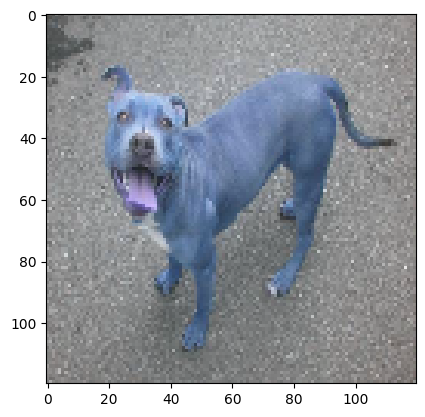

In [7]:
plt.imshow(dogs[112][0])

### 4-4. 학습용 데이터 전처리

#### 데이터 그대로 사용

In [8]:
x1=[]
y1=[]
for value in cats:
    x1.append(value[0])
    y1.append(value[1])
for value in dogs:
    x1.append(value[0])
    y1.append(value[1])

len(x1), len(y1), #x1[2555], y1[2555]

(4000, 4000)

In [9]:
train = np.array(x1[:3000])
train_label = np.array(y1[:3000])

validate = np.array(x1[3000:3500])
validate_label = np.array(y1[3000:3500])


test = np.array(x1[3500:])
test_label = np.array(y1[3500:])

train.shape, test.shape, train_label.shape, test_label.shape

((3000, 120, 120, 3), (500, 120, 120, 3), (3000,), (500,))

#### 데이터 랜덤하게 섞기

In [10]:
datas =dogs + cats

random.seed(90)
random.shuffle(datas)

x2=[]
y2=[]
for value in datas:
    x2.append(value[0])
    y2.append(value[1])


len(x2), len(y2), #x2[155], y2[155]

(4000, 4000)

In [11]:
train_mixed = np.array(x2[:3000])
train_label_mixed = np.array(y2[:3000])

validate_mixed = np.array(x2[3000:3500])
validate_label_mixed = np.array(y2[3000:3500])

test_mixed = np.array(x2[3500:])
test_label_mixed = np.array(y2[3500:])

train_mixed.shape, test_mixed.shape, train_label_mixed.shape, test_label_mixed.shape

((3000, 120, 120, 3), (500, 120, 120, 3), (3000,), (500,))

# 5. 딥러닝 모델 설계 및 학습

In [12]:
catDogClassifier  = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(120,120,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')

])
catDogClassifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 256)               11059456  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,078,050
Trainable params: 11,078,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
catDogClassifier.compile(optimizer = 'adam',
                         loss = 'sparse_categorical_crossentropy',
                         metrics = ['accuracy'])

In [14]:
history = catDogClassifier.fit(train, train_label, epochs=20, validation_data=(validate, validate_label))

Epoch 1/20
94/94 [==============================] - 7s 8ms/step - loss: 474.9358 - accuracy: 0.5693 - val_loss: 748.5594 - val_accuracy: 0.0000e+00
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 169.2376 - accuracy: 0.5760 - val_loss: 4.3180 - val_accuracy: 0.9100
Epoch 3/20
94/94 [==============================] - 1s 6ms/step - loss: 82.8078 - accuracy: 0.5943 - val_loss: 261.6536 - val_accuracy: 0.0220
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 71.8569 - accuracy: 0.6017 - val_loss: 11.7022 - val_accuracy: 0.7800
Epoch 5/20
94/94 [==============================] - 1s 8ms/step - loss: 44.2006 - accuracy: 0.6180 - val_loss: 704.5385 - val_accuracy: 0.0000e+00
Epoch 6/20
94/94 [==============================] - 1s 11ms/step - loss: 304.6375 - accuracy: 0.5337 - val_loss: 67.7971 - val_accuracy: 0.3960
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 55.5285 - accuracy: 0.5810 - val_loss: 48.9045 - val_accuracy:

In [15]:
catDogClassifier_mixed  = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(120,120,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')

])
catDogClassifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 256)               11059456  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,078,050
Trainable params: 11,078,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
catDogClassifier_mixed.compile(optimizer = 'adam',
                         loss = 'sparse_categorical_crossentropy',
                         metrics = ['accuracy'])

In [17]:
history_mixed = catDogClassifier_mixed.fit(train_mixed, train_label_mixed, epochs=20, validation_data=(validate_mixed, validate_label_mixed))

Epoch 1/20
94/94 [==============================] - 2s 8ms/step - loss: 363.2341 - accuracy: 0.5177 - val_loss: 202.2311 - val_accuracy: 0.4860
Epoch 2/20
94/94 [==============================] - 1s 7ms/step - loss: 200.9053 - accuracy: 0.5393 - val_loss: 48.3446 - val_accuracy: 0.5880
Epoch 3/20
94/94 [==============================] - 1s 7ms/step - loss: 184.9891 - accuracy: 0.5193 - val_loss: 287.8528 - val_accuracy: 0.4900
Epoch 4/20
94/94 [==============================] - 1s 7ms/step - loss: 102.6280 - accuracy: 0.5470 - val_loss: 29.2772 - val_accuracy: 0.5360
Epoch 5/20
94/94 [==============================] - 1s 7ms/step - loss: 40.7098 - accuracy: 0.5707 - val_loss: 15.3284 - val_accuracy: 0.5620
Epoch 6/20
94/94 [==============================] - 1s 7ms/step - loss: 101.7024 - accuracy: 0.5423 - val_loss: 30.6366 - val_accuracy: 0.5340
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 26.8584 - accuracy: 0.5930 - val_loss: 55.3447 - val_accuracy: 0.4880

# 7. 학습모델 평가

In [18]:
img_test = test_mixed[251] #251 설명 미흡되는 이미지

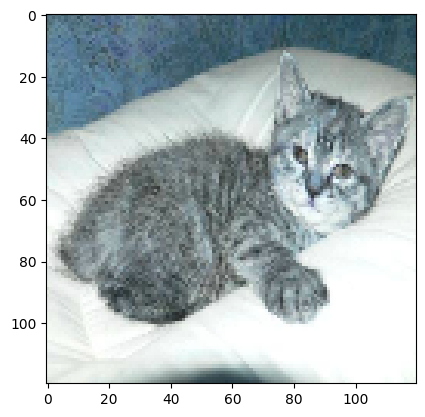

In [19]:
plt.imshow(img_test)

In [20]:
print("Test Accuracy",catDogClassifier.evaluate(test,test_label))
print('\n')
results = catDogClassifier.predict(img_test.reshape(1,120,120,3)) #[ 0, 1]
print(f"Prediction Dog : [{results[0][0]}]\nPrediction Cat : [{results[0][1]}]")

16/16 [==============================] - 0s 3ms/step - loss: 7.2090 - accuracy: 0.0280
Test Accuracy [7.209038734436035, 0.02800000086426735]


1/1 [==============================] - 0s 114ms/step
Prediction Dog : [0.0001904683595057577]
Prediction Cat : [0.9998095631599426]


In [21]:
print("Test2 Accuracy",catDogClassifier_mixed.evaluate(test_mixed, test_label_mixed))
print('\n')
results_mixed = catDogClassifier_mixed.predict(img_test.reshape(1,120,120,3)) #[ 0, 1]
print(f"\nPrediction Dog : [{results_mixed[0][0]}]\nPrediction Cat : [{results_mixed[0][1]}]")

16/16 [==============================] - 0s 3ms/step - loss: 2.7747 - accuracy: 0.5740
Test2 Accuracy [2.774681568145752, 0.5740000009536743]


1/1 [==============================] - 0s 63ms/step

Prediction Dog : [0.9999961853027344]
Prediction Cat : [3.790411255977233e-06]


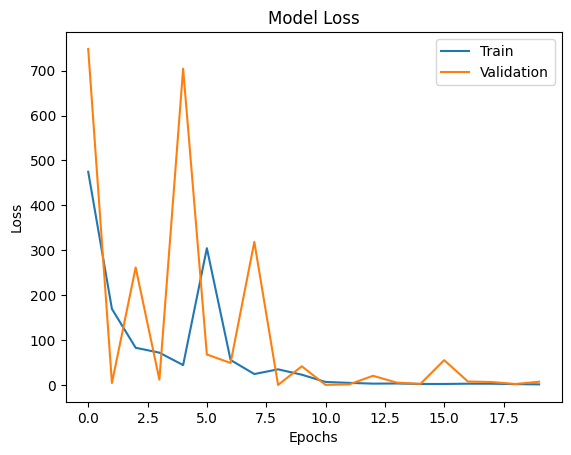

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

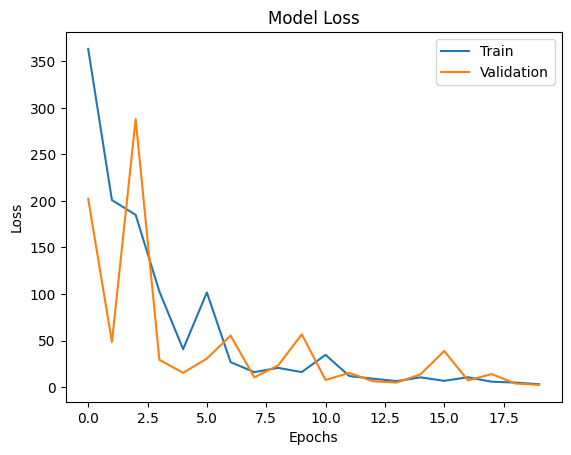

In [23]:
plt.plot(history_mixed.history['loss'])
plt.plot(history_mixed.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()